# Desafio 2 - Parte Individual

**Perguntas (Obrigatório):**

1) Pense na Hipótese de 2 universidades A e B onde X é a média de notas delas e elas tem exatamente os mesmos cursos. É possível que A_X > B_X e TODOS os cursos de B sejam melhores (notas maiores) que os de A? Explique (não são necessários códigos, apenas a explicação). Dica: paradoxo de simpson.

2) Rode uma regressão multipla que use, entre outras, a carga horária de um curso como variavel independente para explicar a idade dos alunos formados.

3) Qual a probabilidade de pegarmos um professor ao acaso no Brasil e ele ter mais do que o dobro da sua idade dado que ele é homem.

Obs: Não usar informações que não estejam na pasta Desafios nas partes Obrigatórias

## Resposta 1

Sim, é possível que a média 'A_X' de notas da Universidade A seja maior que a média 'B_X' de notas da Universidade B, mesmo que TODOS os cursos da Universidade B tenham notas maiores que os cursos da Universidade A.

Isso pode ocorrer como explicado no Paradoxo de Simpson.

Ref. Simpson’s Paradox: How to Prove Opposite Arguments with the Same Data

https://towardsdatascience.com/simpsons-paradox-how-to-prove-two-opposite-arguments-using-one-dataset-1c9c917f5ff9

Explicação:

Uma possível explicação seria o fato de que não está sendo levado em consideração algum dado, como por exemplo o tamanho de cada amostra, e como foi feito o processo de classificação das universidades e dos cursos, em resumo, como estas notas foram determinadas.

Para efeito de um exemplo, podemos considerar que as notas dos cursos e das Universidades vêm dos próprios alunos. Assim aqueles que tiveram um bom curso deram boas notas tanto para o curso que realizaram como para a Universidade. E o mesmo ocorreria em caso contrário.

Assim, baseado nesta afirmação, poderíamos exemplificar com alguns números.

Hipóteses:

- Universidade A e Universiade B tem os mesmos cursos F e G
- Universidade A -> curso F com 800 alunos / curso G com 3200 alunos (Total de alunos Universidade A = 4.000)
- Universidade B -> curso F com 300 alunos / curso G com 100 alunos (Total de alunos Universidade B = 400)
- Média de notas para Universidade A -> A_X
- Média de notas para Universidade B -> B_X
- Média de notas para o curso F na Universidade A -> F_A_X
- Média de notas para o curso G na Universidade A -> G_A_X
- Média de notas para o curso F na Universidade B -> F_B_X
- Média de notas para o curso G na Universidade B -> G_B_X

Definições do problema:

- TODOS os cursos da Universidade B tem notas maiores que os cursos da Universidade A (F_B_X > F_A_X e G_B_X > G_A_X).
- Provar que é possível que a nota da Universidade A pode ser maior que a nota da Universidade B (A_X > B_X).

Solução:

Assumindo como exemplo:

- F_B_X = 7 > F_A_X = 6
- G_B_X = 9.5 > G_A_X = 9

Cálculo da média de nota por Universidade:

- A_X = ( (800 alunos x nota do curso F) + (3200 alunos x nota do curso G) ) / 4000 alunos
- A_X = ((800 x 6) + (3200 x 9)) / 4000 = (4800 + 28800) / 4000 = 33600 / 4000 = 8.4


- B_X = ( (300 alunos x nota do curso F) + (100 alunos x nota do curso G) ) / 400 alunos
- B_X = ((300 x 7) + (100 x 9.5)) / 400 = (2100 + 950) / 400 = 3050 / 400 = 7.625

Portanto, para este caso, a média 'A_X' de notas da Universidade A de 8.4 é MAIOR do que a média 'B_X' de notas da Universidade B de 7.625, mesmo que individualmente as notas dos mesmos cursos na Universidade B são maiores do que as de A.

## Resposta 2

Regressão multipla usando, entre outras, a carga horária de um curso como variável independente para explicar a idade dos alunos formados.

In [1]:
import os
import sqlite3
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import seaborn as sns
from scipy import stats
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
desktop = os.path.join(os.path.expanduser("~"), "Desktop")
filePath_db = os.path.join(desktop, "Microdados_Educacao_Superior_2017\DADOS\Desafio_2A.db")

db = sqlite3.connect(filePath_db)

In [3]:
# CO_IES - Código único de identificação da IES
# CO_CURSO - Código único de identificação do curso
# NO_CURSO - Nome do curso
# NU_CARGA_HORARIA - Carga horária mínima do curso
# TP_GRAU_ACADEMICO - Código do grau acadêmico conferido ao ao aluno pela conclusão dos requisitos exigidos pelo curso
#  "1. Bacharelado / 2. Licenciatura / 3. Tecnológico / 4. Bacharelado e Licenciatura
#  (.) Não aplicável (cursos com nivel acadêmico igual a sequencial de formação específica ou
#  cursos de área básica de curso identificada pela variável TP_ATRIBUTO_INGRESSO)"
# TP_MODALIDADE_ENSINO - Código da modalidade de ensino do curso
#  "1. Presencial / 2. Curso a distância"

CURSOS = ('''select
             CO_IES,
             CO_CURSO,
             NO_CURSO,
             NU_CARGA_HORARIA,
             TP_GRAU_ACADEMICO,
             TP_MODALIDADE_ENSINO
             from DM_CURSO''')

In [4]:
df_cursos = pd.read_sql_query(CURSOS,db)
df_cursos.shape

(35693, 6)

In [5]:
df_cursos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35693 entries, 0 to 35692
Data columns (total 6 columns):
CO_IES                  35693 non-null int64
CO_CURSO                35693 non-null int64
NO_CURSO                35693 non-null object
NU_CARGA_HORARIA        35693 non-null int64
TP_GRAU_ACADEMICO       35380 non-null float64
TP_MODALIDADE_ENSINO    35693 non-null int64
dtypes: float64(1), int64(4), object(1)
memory usage: 1.6+ MB


In [6]:
df_cursos.head()

,CO_IES,CO_CURSO,NO_CURSO,NU_CARGA_HORARIA,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO
0,789,1259131,MÚSICA,3210,2.0,1
1,4567,1258115,GESTÃO DE RECURSOS HUMANOS,1720,3.0,1
2,2341,68433,DIREITO,4080,1.0,1
3,670,52052,ENGENHARIA ELÉTRICA,3892,1.0,1
4,403,18061,DIREITO,3790,1.0,1


In [7]:
# CO_IES - Código único de identificação da IES
# CO_CURSO - Código único de identificação do curso
# NU_ANO_NASCIMENTO - Ano de nascimento do aluno
# NU_IDADE - Idade que o aluno completa no ano de referência do Censo
# NU_ANO_INGRESSO - Ano de ingresso do aluno no curso
# TP_SITUACAO - Código do tipo de situação de vínculo do aluno no curso
#  2. Cursando / 3. Matrícula trancada / 4. Desvinculado do curso /  5. Transferido para outro curso da mesma IES
#  6. Formado / 7. Falecido

ALUNOS = ('''select
             CO_IES,
             CO_CURSO,
             NU_ANO_NASCIMENTO,
             NU_IDADE,
             NU_ANO_INGRESSO,
             TP_SITUACAO
             from DM_ALUNO
             where TP_SITUACAO = 6 or TP_SITUACAO = 7''')

In [8]:
df_alunos = pd.read_sql_query(ALUNOS,db)
df_alunos.shape

(1202451, 6)

In [9]:
df_alunos['TP_SITUACAO'][(df_alunos['TP_SITUACAO'] == 7)].value_counts()

7    1306
Name: TP_SITUACAO, dtype: int64

In [10]:
# Para efeito de análise da variável target "idade dos alunos formados"
# considerei apenas TP_SITUAÇÃO = 6 (Formado), pois nos outros casos os alunos não são formados
# e para o caso TP_SITUAÇÃO = 7 (Falecido), além de ser uma porcentagem muito pequena do total (1306 em 1202451)
# não está claro se o aluno faleceu antes de se formar ou depois de formado

# Dropando linhas onde TP_SITUAÇÃO = 7
df_alunos.drop(index=df_alunos[(df_alunos['TP_SITUACAO'] == 7)].index, inplace=True)

# Dropando a coluna TP_SITUAÇÃO pois somente temos TP_SITUAÇÃO = 6
df_alunos.drop(columns='TP_SITUACAO', inplace=True)
df_alunos.shape

(1201145, 5)

In [11]:
df_alunos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201145 entries, 0 to 1202450
Data columns (total 5 columns):
CO_IES               1201145 non-null int64
CO_CURSO             1201145 non-null int64
NU_ANO_NASCIMENTO    1201145 non-null int64
NU_IDADE             1201145 non-null int64
NU_ANO_INGRESSO      1201145 non-null int64
dtypes: int64(5)
memory usage: 55.0 MB


In [12]:
df_alunos.head()

,CO_IES,CO_CURSO,NU_ANO_NASCIMENTO,NU_IDADE,NU_ANO_INGRESSO
0,1,1,1978,39,2013
1,1,1,1987,30,2013
2,1,1,1980,37,2012
3,1,1,1975,42,2014
4,1,1,1978,39,2016


In [13]:
df_alunos1 = df_alunos.merge(df_cursos, how='left', on=['CO_IES', 'CO_CURSO'])

In [14]:
df_alunos1.shape

(1201145, 9)

In [15]:
df_alunos1.head()

,CO_IES,CO_CURSO,NU_ANO_NASCIMENTO,NU_IDADE,NU_ANO_INGRESSO,NO_CURSO,NU_CARGA_HORARIA,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO
0,1,1,1978,39,2013,DIREITO,3700,1.0,1
1,1,1,1987,30,2013,DIREITO,3700,1.0,1
2,1,1,1980,37,2012,DIREITO,3700,1.0,1
3,1,1,1975,42,2014,DIREITO,3700,1.0,1
4,1,1,1978,39,2016,DIREITO,3700,1.0,1


In [16]:
df_alunos1.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201145 entries, 0 to 1201144
Data columns (total 9 columns):
CO_IES                  1201145 non-null int64
CO_CURSO                1201145 non-null int64
NU_ANO_NASCIMENTO       1201145 non-null int64
NU_IDADE                1201145 non-null int64
NU_ANO_INGRESSO         1201145 non-null int64
NO_CURSO                1201145 non-null object
NU_CARGA_HORARIA        1201145 non-null int64
TP_GRAU_ACADEMICO       1199769 non-null float64
TP_MODALIDADE_ENSINO    1201145 non-null int64
dtypes: float64(1), int64(7), object(1)
memory usage: 91.6+ MB


In [17]:
df_alunos1.corr()

,CO_IES,CO_CURSO,NU_ANO_NASCIMENTO,NU_IDADE,NU_ANO_INGRESSO,NU_CARGA_HORARIA,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO
CO_IES,1.000000,0.172216,-0.002118,0.002118,0.021235,-0.020068,0.042595,-0.154424
CO_CURSO,0.172216,1.000000,-0.050537,0.050537,0.125901,-0.102816,0.164627,0.076425
NU_ANO_NASCIMENTO,-0.002118,-0.050537,1.000000,-1.000000,-0.022737,0.111674,-0.160471,-0.331934
NU_IDADE,0.002118,0.050537,-1.000000,1.000000,0.022737,-0.111674,0.160471,0.331934
NU_ANO_INGRESSO,0.021235,0.125901,-0.022737,0.022737,1.000000,-0.399766,0.415189,0.241755
NU_CARGA_HORARIA,-0.020068,-0.102816,0.111674,-0.111674,-0.399766,1.000000,-0.607311,-0.288820
TP_GRAU_ACADEMICO,0.042595,0.164627,-0.160471,0.160471,0.415189,-0.607311,1.000000,0.364311
TP_MODALIDADE_ENSINO,-0.154424,0.076425,-0.331934,0.331934,0.241755,-0.288820,0.364311,1.000000


De acordo com o resultado da correlação, as variáveis mais relevantes para tentar explicar a Idade do Aluno formado são:

- TP_MODALIDADE_ENSINO -> -0.33
- TP_GRAU_ACADEMICO -> -0.16
- NU_CARGA_HORARIA -> 0.11
- NU_ANO_INGRESSO -> -0.02

In [18]:
df_alunos2 = df_alunos1.drop(columns = ['CO_IES', 
                                        'CO_CURSO',
                                        'NO_CURSO',
                                        'NU_ANO_NASCIMENTO',])

In [19]:
df_alunos2.shape

(1201145, 5)

In [20]:
df_alunos2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201145 entries, 0 to 1201144
Data columns (total 5 columns):
NU_IDADE                1201145 non-null int64
NU_ANO_INGRESSO         1201145 non-null int64
NU_CARGA_HORARIA        1201145 non-null int64
TP_GRAU_ACADEMICO       1199769 non-null float64
TP_MODALIDADE_ENSINO    1201145 non-null int64
dtypes: float64(1), int64(4)
memory usage: 55.0 MB


In [21]:
df_alunos2.head()

,NU_IDADE,NU_ANO_INGRESSO,NU_CARGA_HORARIA,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO
0,39,2013,3700,1.0,1
1,30,2013,3700,1.0,1
2,37,2012,3700,1.0,1
3,42,2014,3700,1.0,1
4,39,2016,3700,1.0,1


In [22]:
df_alunos2.corr()

,NU_IDADE,NU_ANO_INGRESSO,NU_CARGA_HORARIA,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO
NU_IDADE,1.000000,0.022737,-0.111674,0.160471,0.331934
NU_ANO_INGRESSO,0.022737,1.000000,-0.399766,0.415189,0.241755
NU_CARGA_HORARIA,-0.111674,-0.399766,1.000000,-0.607311,-0.288820
TP_GRAU_ACADEMICO,0.160471,0.415189,-0.607311,1.000000,0.364311
TP_MODALIDADE_ENSINO,0.331934,0.241755,-0.288820,0.364311,1.000000


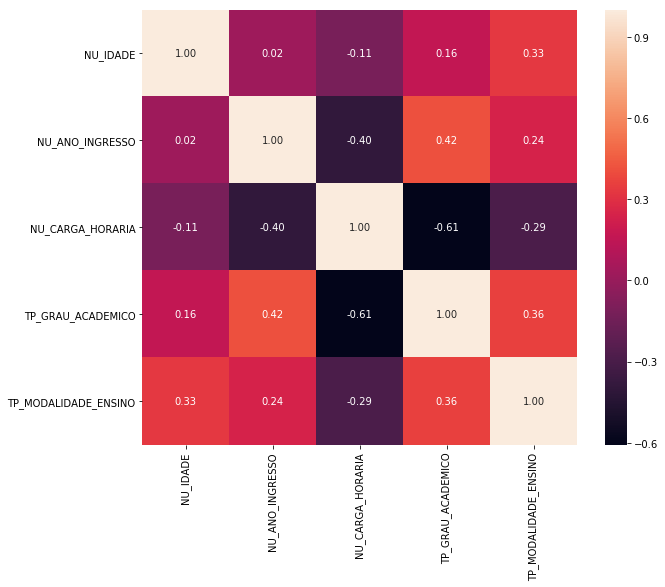

In [23]:
# Rodando um gráfico heatmap mostrando apenas 5 variáveis que mais se correlacionam com a Idade

corr = df_alunos2.corr()

f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr,
                 cbar=True,
                 annot=True,
                 square=True,
                 fmt='.2f',
                 annot_kws={'size': 10},
                 yticklabels=corr.columns,
                 xticklabels=corr.columns)

In [24]:
df_alunos2.corr().round(2)['NU_IDADE'].sort_values(ascending=False)

NU_IDADE                1.00
TP_MODALIDADE_ENSINO    0.33
TP_GRAU_ACADEMICO       0.16
NU_ANO_INGRESSO         0.02
NU_CARGA_HORARIA       -0.11
Name: NU_IDADE, dtype: float64

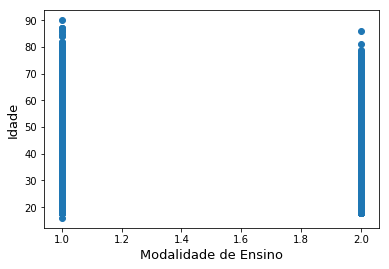

In [25]:
# Plotando um gráfico de dispersão para Modalidade de Ensino
# "1. Presencial / 2. Curso a distância"

fig, ax = plt.subplots()
ax.scatter(y = df_alunos2['NU_IDADE'], x = df_alunos2['TP_MODALIDADE_ENSINO'])
plt.ylabel('Idade', fontsize=13)
plt.xlabel('Modalidade de Ensino', fontsize=13)
plt.show()

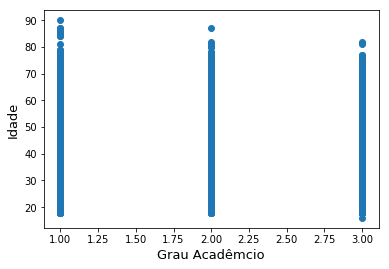

In [26]:
# Plotando um gráfico de dispersão para Grau Acadêmico
# 1. Bacharelado / 2. Licenciatura / 3. Tecnológico / 4. Bacharelado e Licenciatura

fig, ax = plt.subplots()
ax.scatter(y = df_alunos2['NU_IDADE'], x = df_alunos2['TP_GRAU_ACADEMICO'])
plt.ylabel('Idade', fontsize=13)
plt.xlabel('Grau Acadêmcio', fontsize=13)
plt.show()

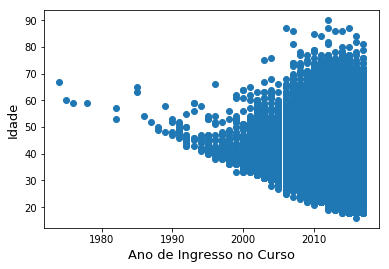

In [27]:
# Plotando um gráfico de dispersão para Ano de Ingresso

fig, ax = plt.subplots()
ax.scatter(y = df_alunos2['NU_IDADE'], x = df_alunos2['NU_ANO_INGRESSO'])
plt.ylabel('Idade', fontsize=13)
plt.xlabel('Ano de Ingresso no Curso', fontsize=13)
plt.show()

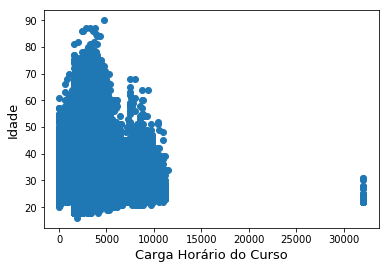

In [28]:
# Plotando um gráfico de dispersão para Carga Horária

fig, ax = plt.subplots()
ax.scatter(y = df_alunos2['NU_IDADE'], x = df_alunos2['NU_CARGA_HORARIA'])
plt.ylabel('Idade', fontsize=13)
plt.xlabel('Carga Horário do Curso', fontsize=13)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:448: RuntimeWarning: invali

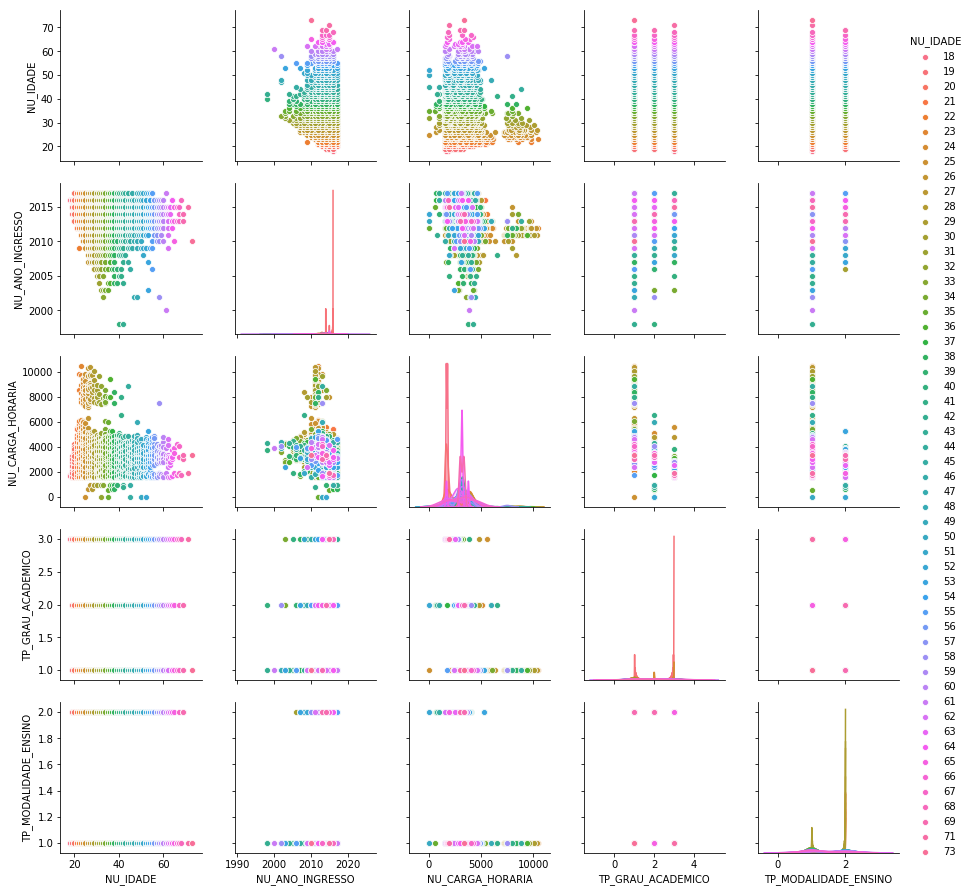

In [29]:
# Plotando o PAIRPLOT para todas as variáveis 
sns.pairplot(df_alunos2.sample(10000), hue='NU_IDADE')

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


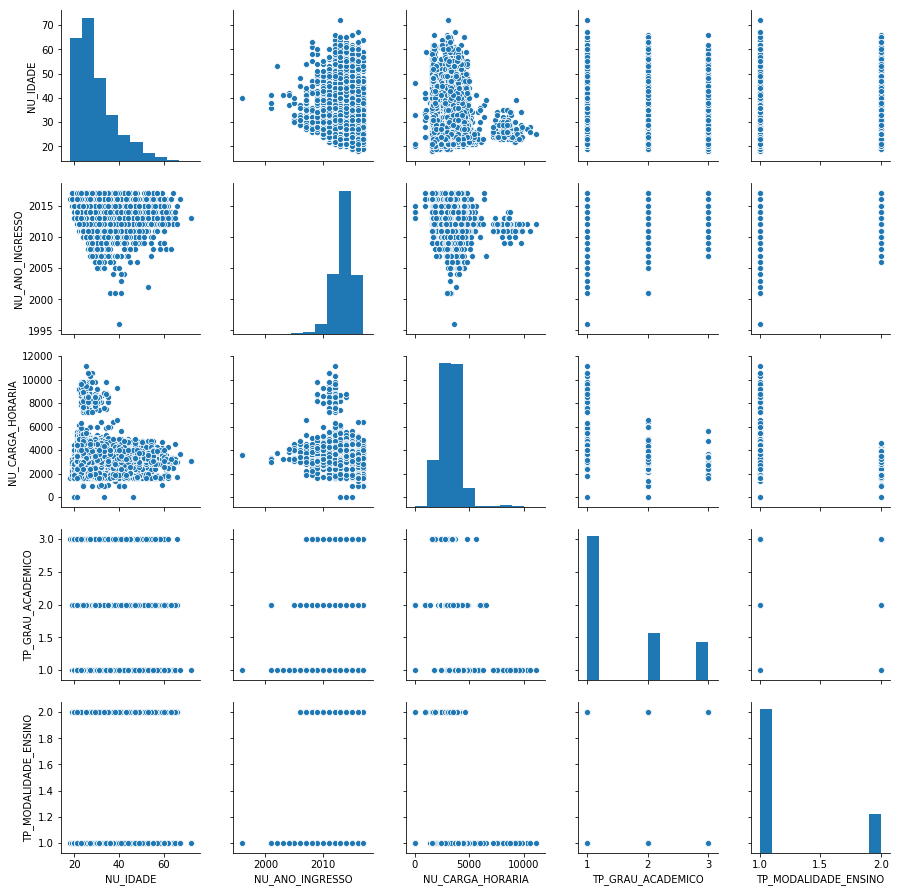

In [30]:
sns.pairplot(df_alunos2.sample(10000))

In [31]:
df_alunos2_sample = df_alunos2.sample(10000)

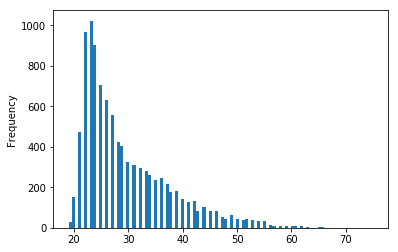

In [32]:
df_alunos2_sample['NU_IDADE'].plot.hist(bins=100)

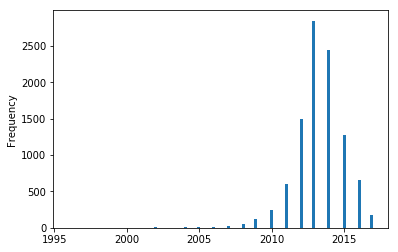

In [33]:
df_alunos2_sample['NU_ANO_INGRESSO'].plot.hist(bins=100)

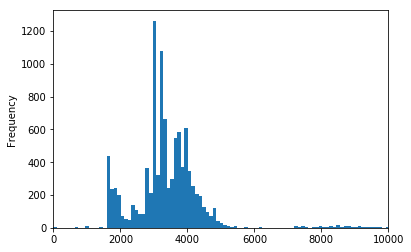

In [34]:
df_alunos2_sample['NU_CARGA_HORARIA'].plot.hist(bins=100, xlim=(0,10000))


 mu = 29.36 and sigma = 8.25



Text(0.5, 1.0, 'Idade')

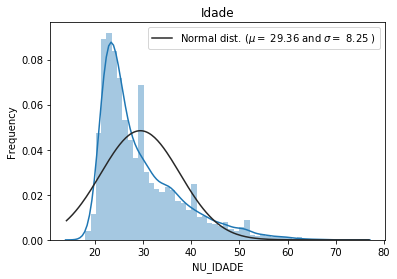

In [35]:
sns.distplot(df_alunos2['NU_IDADE'].sample(10000) , fit=stats.norm);

(mu, sigma) = stats.norm.fit(df_alunos2['NU_IDADE'].sample(10000))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Idade')

In [36]:
# Ajustando Idade com log
df_alunos2['NU_IDADE_LOG'] = np.log1p(df_alunos2['NU_IDADE'])

In [37]:
df_alunos2.head()

,NU_IDADE,NU_ANO_INGRESSO,NU_CARGA_HORARIA,TP_GRAU_ACADEMICO,TP_MODALIDADE_ENSINO,NU_IDADE_LOG
0,39,2013,3700,1.0,1,3.688879
1,30,2013,3700,1.0,1,3.433987
2,37,2012,3700,1.0,1,3.637586
3,42,2014,3700,1.0,1,3.761200
4,39,2016,3700,1.0,1,3.688879



 mu = 3.38 and sigma = 0.24



Text(0.5, 1.0, 'Log da Idade')

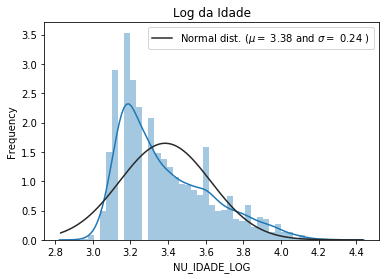

In [38]:
sns.distplot(df_alunos2['NU_IDADE_LOG'].sample(10000) , fit=stats.norm);

(mu, sigma) = stats.norm.fit(df_alunos2['NU_IDADE_LOG'].sample(10000))
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Log da Idade')

In [39]:
list(df_alunos2)

['NU_IDADE',
 'NU_ANO_INGRESSO',
 'NU_CARGA_HORARIA',
 'TP_GRAU_ACADEMICO',
 'TP_MODALIDADE_ENSINO',
 'NU_IDADE_LOG']

In [40]:
# Rodando uma Regressão Multipla usando, entre outras, a carga horária de um curso como variável independente
# para explicar a idade dos alunos formados (NU_IDADE -> TARGET)

function = '''NU_IDADE_LOG ~
 NU_ANO_INGRESSO +
 NU_CARGA_HORARIA + 
 TP_GRAU_ACADEMICO +
 TP_MODALIDADE_ENSINO'''

model = smf.ols(function, df_alunos2).fit() 
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:           NU_IDADE_LOG   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.127
Method:                 Least Squares   F-statistic:                 4.378e+04
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:45:01   Log-Likelihood:                 80797.
No. Observations:             1199769   AIC:                        -1.616e+05
Df Residuals:                 1199764   BIC:                        -1.615e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               33.8356 

In [41]:
df_alunos2 = df_alunos2.dropna()

In [42]:
# Utilizando o modelo para realizar predições para a Idade dos Alunos formados
df_alunos2['yhat'] = model.predict()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [43]:
df_alunos2[['yhat', 'NU_IDADE_LOG']].corr()

,yhat,NU_IDADE_LOG
yhat,1.000000,0.356877
NU_IDADE_LOG,0.356877,1.000000


In [44]:
# Criando uma coluna no DataFrame com so valores dos ERROS
df_alunos2['erro'] = df_alunos2['yhat'] - df_alunos2['NU_IDADE_LOG']

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


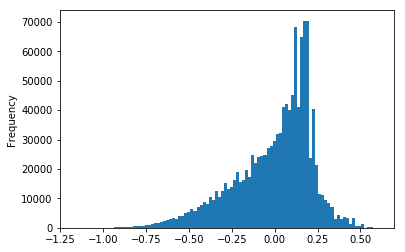

In [45]:
# Plotando o histograma da distrobuição dos erros para verificar se é NORMAL
df_alunos2['erro'].plot.hist(bins=100)

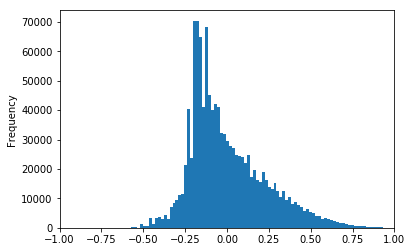

In [46]:
# Verificando o histograma de distribuição dos ERROS para o modelo 9 (Normal)
model.resid.plot.hist(bins=100, xlim=(-1,1))

Criando um novo modelo com DUMMIES

In [47]:
df_alunos3 = df_alunos2.drop(columns=['yhat', 'erro'])

In [48]:
# Dummizando a variável categorica TP_GRAU_ACADEMICO

df_alunos3['TP_GRAU_ACADEMICO'] = df_alunos3['TP_GRAU_ACADEMICO'].astype('int').astype('category')
df_alunos3 = pd.get_dummies(df_alunos3)
df_alunos3.head()

,NU_IDADE,NU_ANO_INGRESSO,NU_CARGA_HORARIA,TP_MODALIDADE_ENSINO,NU_IDADE_LOG,TP_GRAU_ACADEMICO_1,TP_GRAU_ACADEMICO_2,TP_GRAU_ACADEMICO_3
0,39,2013,3700,1,3.688879,1,0,0
1,30,2013,3700,1,3.433987,1,0,0
2,37,2012,3700,1,3.637586,1,0,0
3,42,2014,3700,1,3.761200,1,0,0
4,39,2016,3700,1,3.688879,1,0,0


In [49]:
list(df_alunos3)

['NU_IDADE',
 'NU_ANO_INGRESSO',
 'NU_CARGA_HORARIA',
 'TP_MODALIDADE_ENSINO',
 'NU_IDADE_LOG',
 'TP_GRAU_ACADEMICO_1',
 'TP_GRAU_ACADEMICO_2',
 'TP_GRAU_ACADEMICO_3']

In [50]:
function2 = '''NU_IDADE_LOG ~
 NU_ANO_INGRESSO +
 NU_CARGA_HORARIA + 
 TP_GRAU_ACADEMICO_1 +
 TP_GRAU_ACADEMICO_2 +
 TP_GRAU_ACADEMICO_3 +
 TP_MODALIDADE_ENSINO'''

model2 = smf.ols(function2, df_alunos3).fit() 
print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:           NU_IDADE_LOG   R-squared:                       0.132
Model:                            OLS   Adj. R-squared:                  0.132
Method:                 Least Squares   F-statistic:                 3.664e+04
Date:                Thu, 05 Sep 2019   Prob (F-statistic):               0.00
Time:                        13:46:06   Log-Likelihood:                 84324.
No. Observations:             1199769   AIC:                        -1.686e+05
Df Residuals:                 1199763   BIC:                        -1.686e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               24.4250 

In [51]:
df_alunos3['yhat'] = model2.predict()
df_alunos3[['yhat', 'NU_IDADE_LOG']].corr()

,yhat,NU_IDADE_LOG
yhat,1.000000,0.363974
NU_IDADE_LOG,0.363974,1.000000


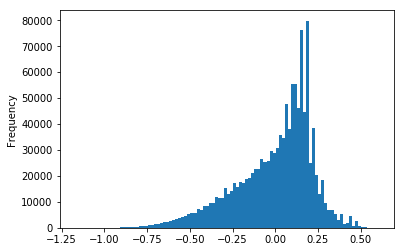

In [52]:
df_alunos3['erro'] = df_alunos3['yhat'] - df_alunos3['NU_IDADE_LOG']
df_alunos3['erro'].plot.hist(bins=100)

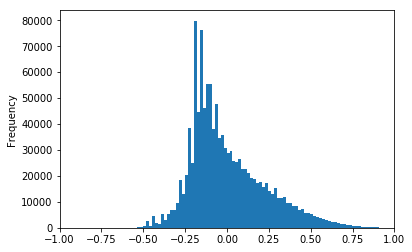

In [53]:
model2.resid.plot.hist(bins=100, xlim=(-1,1))

**Conclusão:**

Os resultados mostram que:
- O erro não apresentou uma curva normal
- As correlações entre as variáveis explicatórias e a variável target apresentaram valores baixos:

TP_MODALIDADE_ENSINO    0.33
TP_GRAU_ACADEMICO       0.16
NU_ANO_INGRESSO         0.02
NU_CARGA_HORARIA -0.11

- O valor de R^2 dos modelos também apresentaram baixos valores de 0.127 e 0.132

Em resumo, não foi possível criar um bom modelo para explicar a Idade do Aluno formado com as variáveis apresentadas, incluindo a variável carga horária do curso. 

## Resposta 3

Probabilidade de:

- pegarmos um professor ao acaso no Brasil
- ele ter mais do que o dobro da sua idade
- dado que ele é homem

In [54]:
# Analisando os dados de DM_DOCENTE
#
# TP_SITUACAO:
# "1. Em exercício / 2. Afastado para qualificação / 3. Afastado para exercício em outros órgãos/entidades
#  4. Afastado por outros motivos / 5. Afastado para tratamento de saúde / 6. Falecido"
# TP_SEXO:
# "1. Feminino / 2. Masculino"
#
# Nota: considerando apenas professores homens em exercício (TP_SITUACAO = 1 e TP_SEXO = 2)

DOCENTES = ('''select
               TP_SEXO,
               NU_IDADE
               from DM_DOCENTE
               where TP_SITUACAO = 1 and TP_SEXO = 2''')

In [55]:
df_docentes = pd.read_sql_query(DOCENTES,db)
df_docentes.shape

(206255, 2)

In [56]:
df_docentes.describe()

,TP_SEXO,NU_IDADE
count,206255.0,206255.000000
mean,2.0,45.306179
std,0.0,11.242007
min,2.0,19.000000
25%,2.0,36.000000
50%,2.0,44.000000
75%,2.0,53.000000
max,2.0,99.000000


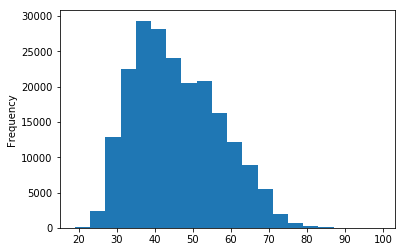

In [57]:
df_docentes.NU_IDADE.plot.hist(bins=20)

In [58]:
# Ajustando Idade com log
df_docentes['log_idade'] = np.log1p(df_docentes['NU_IDADE'])

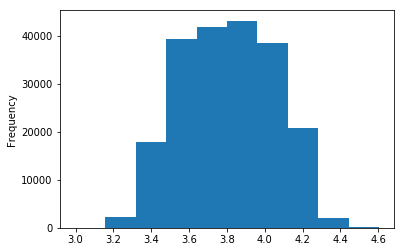

In [59]:
df_docentes.log_idade.plot.hist()

In [60]:
minha_idade = 45
minha_log_idade = np.log1p(minha_idade)

n_docentes = len(df_docentes['log_idade'])
media_docentes = df_docentes['log_idade'].mean()
sigma_docentes = df_docentes['log_idade'].std()

print(minha_idade, minha_log_idade, n_docentes, media_docentes, sigma_docentes)

45 3.828641396489095 206255 3.80599415634635 0.24248921848922075


In [61]:
# Realizando Z-test
# Calculando o Intervalo de Confiança de 95% 
print(media_docentes - 1.96*sigma_docentes, media_docentes + 1.96*sigma_docentes)

3.3307152881074775 4.281273024585223


In [62]:
# Cálculo da probabilidade do docente homem ter mais do que o dobro de minha idade
# -> prob de ser maior do que minha_idade * 2

minha_idade_dobrada = minha_idade * 2
minha_idade_dobrada_log = np.log1p(minha_idade_dobrada)

minha_idade_dobrada_log

# Note que o resultado está além do intervalo de confiança de 95%
# portanto a probabilidade será 1 - p-value do ponto onde estiver localizado a minha_idade_dobrada_log de 4.51

4.51085950651685

In [63]:
z_score_minha_idade_dobrada = (minha_idade_dobrada_log - media_docentes) / sigma_docentes
z_score_minha_idade_dobrada

2.906790473250804

In [64]:
# Calculando com scipy
print(stats.norm.interval(alpha=0.95, loc=media_docentes, scale=sigma_docentes))

(3.3307240214682134, 4.281264291224487)


In [65]:
print(stats.norm.interval(alpha=0.96, loc=media_docentes, scale=sigma_docentes)[1])
print(stats.norm.interval(alpha=0.97, loc=media_docentes, scale=sigma_docentes)[1])
print(stats.norm.interval(alpha=0.98, loc=media_docentes, scale=sigma_docentes)[1])
print(stats.norm.interval(alpha=0.99, loc=media_docentes, scale=sigma_docentes)[1])

4.3040061246585495
4.332217676057808
4.370108434256574
4.4306049911255565


In [66]:
# Achando o valor próximo de z-score de minha_idade_dobrada_log = 4.51085950651685

print(stats.norm.interval(alpha=0.9963482, loc=media_docentes, scale=sigma_docentes)[1])
(1-0.9963482) / 2

4.510854873288285


0.0018258999999999914

**Conclusão, a probabilidade será de menos de 0.2% de encontrar um docente homem acima do dobro de minha idade de 45 anos**